<a href="https://colab.research.google.com/github/vmahawar/tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in Tensorflow

There are many definitions for a regresssion problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variable, even shorter... predicting a number

In [1]:
# Create timestamp
import datetime

print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-08-23 13:47:14.273207


In [2]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.17.0


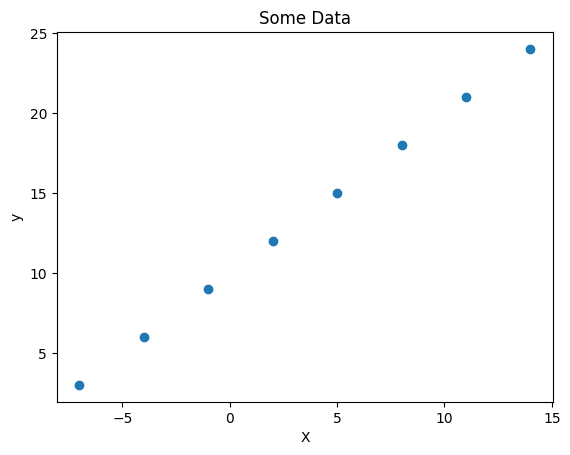

In [3]:
# Create some data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Some Data")
plt.show()

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output Shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[1], y[1]

(-4.0, 6.0)

In [9]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [10]:
# Turn our Numpy Arrays into tensors

X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling the model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting the model** - Letting the model try to find patterns between X & y (features and labels)
4. **Evaluate the model**
5. **use the model to predict**

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential AP
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#  2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 7.5635 - mae: 7.5635
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - loss: 7.4925 - mae: 7.4925
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 7.4869 - mae: 7.4869
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 7.4812 - mae: 7.4812
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 7.4756 - mae: 7.4756


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [14]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


array([[29.469423]], dtype=float32)

In [16]:
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[29.469423]], dtype=float32)

In [17]:
y_pred + 10.64

array([[40.109425]], dtype=float32)

# How to improve our model
We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - We might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [18]:
# Let's rebuild our model to improve increasing the epochs

# 1. Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 16.9464 - mae: 16.9464
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - loss: 16.6652 - mae: 16.6652
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 16.3839 - mae: 16.3839
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 16.1027 - mae: 16.1027
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 15.8214 - mae: 15.8214
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 15.5402 - mae: 15.5402
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - loss: 15.2589 - mae: 15.2589
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 14.9777 - mae: 14.9777
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 14.7676 - mae: 14.7676
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 14.6351 - mae: 14.6351
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 14.5026 - mae: 14.5026
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 14.3701 - mae: 14.3701
Epoch 13/100
1/1 

In [19]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [20]:
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[29.554115]], dtype=float32)

In [21]:
y_pred + 6.9113

array([[36.465416]], dtype=float32)

In [22]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [23]:
model.predict(np.array([17.0],dtype=np.float32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[29.554115]], dtype=float32)

## Improving continued by adding a hidden layer

In [24]:
# Improve the model by adding a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation="relu"))
# model.add(tf.keras.layers.Dense(100, activation="relu"))
# model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step - loss: 13.5583 - mae: 13.5583
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.9769 - mae: 12.9769
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.3933 - mae: 12.3933
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11.8018 - mae: 11.8018
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.1975 - mae: 11.1975
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.5805 - mae: 10.5805
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.9594 - mae: 9.9594
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.3054 - mae: 9.3054
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.6159 - mae: 8.6159
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.8904 - mae: 7.8904
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.1233 - mae: 7.1233
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.3011 - mae: 6.3011
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [25]:
# Let's remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [26]:
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[32.18113]], dtype=float32)

In [27]:
# Improve the model by adding a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation=None))
# model.add(tf.keras.layers.Dense(100, activation="relu"))
# model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step - loss: 13.3282 - mae: 13.3282
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 12.8432 - mae: 12.8432
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 12.3560 - mae: 12.3560
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 11.8640 - mae: 11.8640
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 11.3649 - mae: 11.3649
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.8559 - mae: 10.8559
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.3345 - mae: 10.3345
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.7981 - mae: 9.7981
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.2437 - mae: 9.2437
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.6687 - mae: 8.6687
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.0701 - mae: 8.0701
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.4448 - mae: 7.4448
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [28]:
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[28.25189]], dtype=float32)

In [29]:
# Improve the model by adding a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation=None))
# model.add(tf.keras.layers.Dense(100, activation="relu"))
# model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1))
model.name = "model_1"

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

In [30]:
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step - loss: 15.0871 - mae: 15.0871
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 14.3671 - mae: 14.3671
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13.7065 - mae: 13.7065
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.0573 - mae: 13.0573
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 12.4139 - mae: 12.4139
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.7725 - mae: 11.7725
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.1300 - mae: 11.1300
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.4832 - mae: 10.4832
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 9.8293 - mae: 9.8293
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.1654 - mae: 9.1654
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.4890 - mae: 8.4890
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 7.7975 - mae: 7.7975
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [31]:
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[26.754005]], dtype=float32)

# Evaluation a model

In practise, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model
```

When it comes to evaluation... there are three words you should memorize:

 - "Visualize, Visualize, visualize"

Its a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The prediction of the model - how do the prediction of a model line up against the ground truth (the original value)

In [32]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [33]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

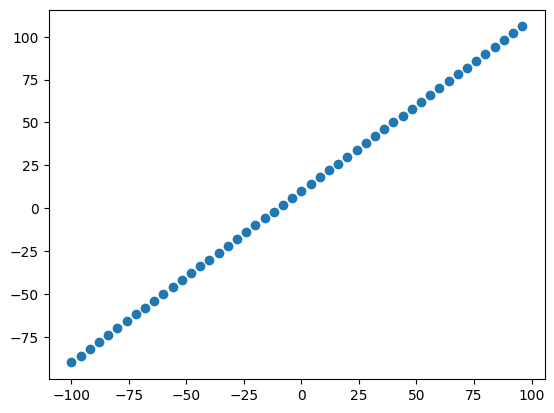

In [34]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets...
* **Training set** - The model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the data available

In [35]:
# Check the length of how many samples we have
len(X)

50

In [36]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

# Visualising the data

Now we'have got our data in training and test sets... Let's visualize it again!

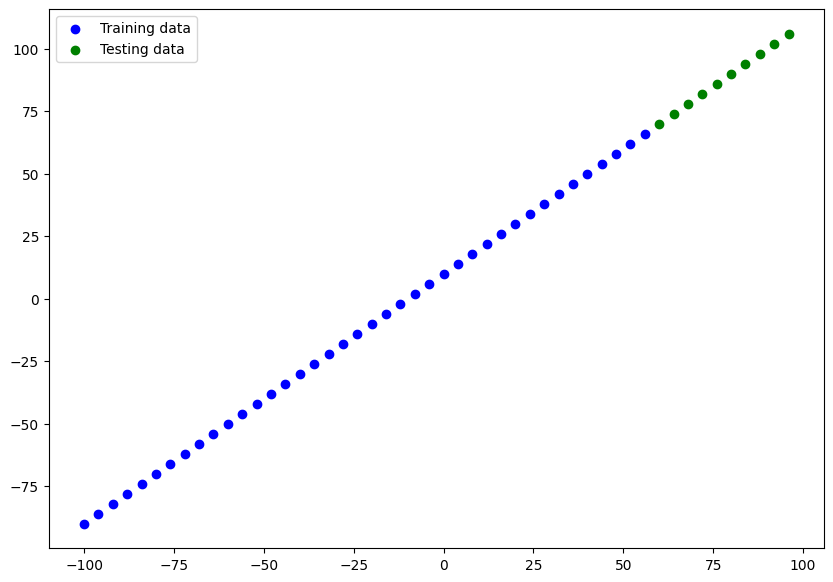

In [37]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot testing data in green
plt.scatter(X_test, y_test,c="g", label="Testing data")
# Show the legend
plt.legend()

In [38]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])

# Compile model (same as )

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Visualizing the model

In [39]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Let's create a model which builds automatically by defining the input_shape arguments
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [41]:
model.build()

In [42]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
# 3. Fit the model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 44.3063 - mae: 44.3063 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.6599 - mae: 12.6599 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2115 - mae: 8.2115 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.7549 - mae: 8.7549 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.6217 - mae: 8.6217 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3898 - mae: 8.3898 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.1322 - mae: 9.1322 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.2043 - mae: 8.2043
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8713 - mae: 8.8713 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.7924 - mae: 7.7924 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.8033 - mae: 10.8033 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.7288 - mae: 7.7288 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [44]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

* **Total Params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-Trainable params** - these parameters aren't updated during training (this is typical when you bring in already learned patterns from other models during **transfer learning**).

In [45]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [60]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)

# model = tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=(1,)),
#                              tf.keras.layers.Dense(1,name="output_layer")
#                              ], name="one of many models we're going to build...")

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,name="input_layer",input_shape=(1,)))
model.add(tf.keras.layers.Dense(1,name="output_layer"))
model.name="model_1"

# 2. Compile the model (same as above)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total Params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains
* **Non-Trainable params** - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models durign **transfer learning**).

Weights and Bias (2 Params)

In [62]:
# Let's fit our model to the training data

model.fit(X_train,y_train,epochs=100,verbose=0)

In [64]:
# Get a summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

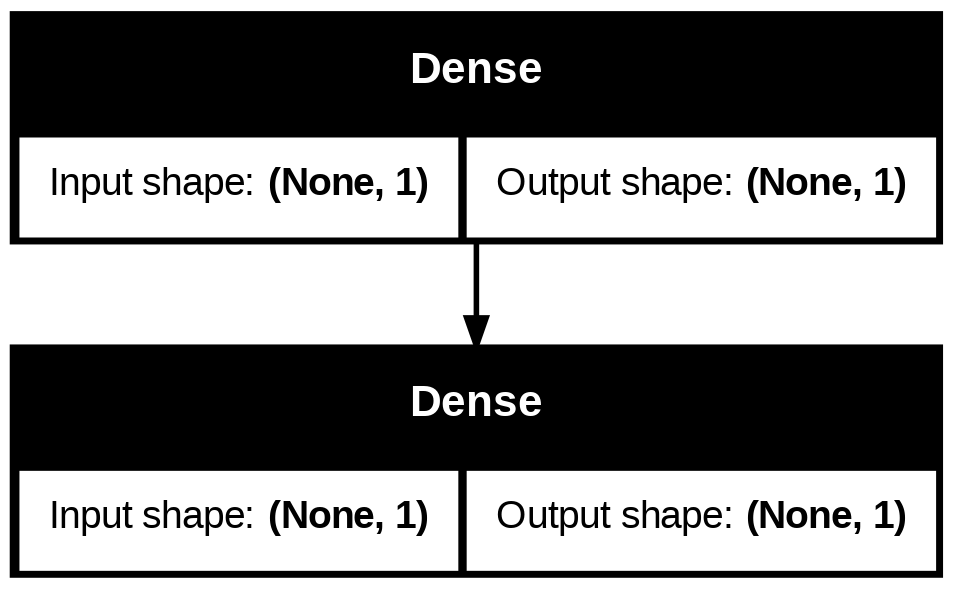

In [63]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_pred` (ground truth versus your model's predictions).

In [65]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[44.14279 ],
       [46.947926],
       [49.75306 ],
       [52.558197],
       [55.36333 ],
       [58.16846 ],
       [60.973602],
       [63.778736],
       [66.58386 ],
       [69.389   ]], dtype=float32)

In [66]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note**: If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function

In [67]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  '''
  Plots training data, test data and compares predictions to the ground truth labels
  '''
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  # Plot testing data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")

  # Show the legend
  plt.legend();
  plt.show()

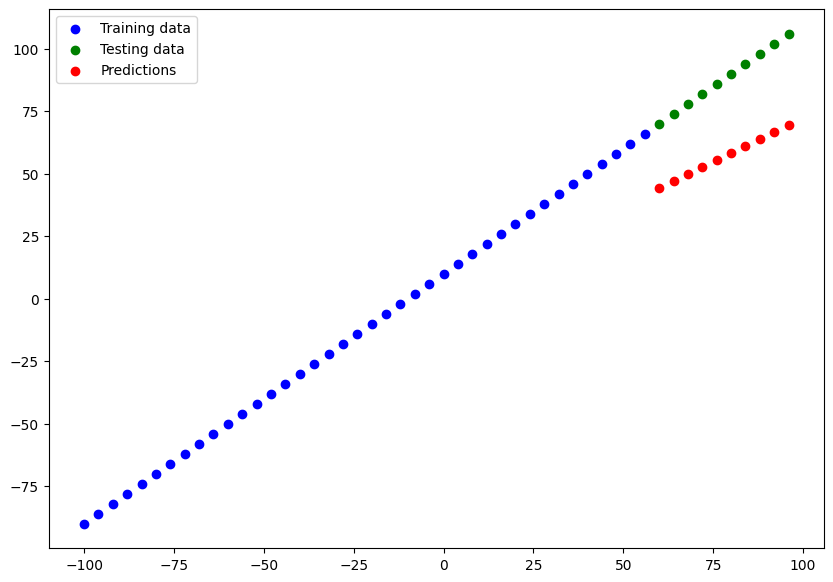

In [71]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

Evalute our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "Square the average errors"